<a href="https://colab.research.google.com/github/irislqy/Classification_Business_cases/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.  Develop ML Binary Classification models in Python, using Jupyter Notebook or any other tool of your choice. Apply LogisticRegression, SVM, RandomForest classification algorithms. Apply Data Science Process Model as a guide. (40 points)
2. Apply GridSearchCV to find the best hyperparameters for your models. (15 points)
3. Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business
impact viewpoint (false negatives vs false positives). (10 points)
4. Apply AutoML (Auto sklearn) to build classification model and compare model performance. (10 points)

## Classfication Model

###Import Dataset

In [0]:
df = h2o.import_file("https://raw.githubusercontent.com/irislqy/Classification_Business_cases/master/diabetes.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


###Import modules

In [0]:
#import

#pandas
import pandas as pd

#numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import time
import random
import sklearn


#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from yellowbrick.features import RFECV
import statsmodels.formula.api as smf

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn import metrics
from sklearn.metrics import mean_absolute_error, accuracy_score


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, auc

In [0]:
df.head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1


In [0]:
#enum
df['Outcome'] = df['Outcome'].asfactor()

## Logistic Regression/ Random Forest/SVM prediction

In [0]:
df_model= pd.read_csv("https://raw.githubusercontent.com/irislqy/Classification_Business_cases/master/diabetes.csv")

In [0]:
df_model.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
features = df_model.drop(['Outcome'],axis=1)
target = df_model.Outcome

In [0]:
# Here is the accuracy of Logistic Regression as 0.818
train_x,test_x,train_y,test_y = train_test_split(features,target,random_state=30,test_size=0.2)
model_Log = LogisticRegression(random_state=34)
model_Log.fit(train_x,train_y)
print("Accuracy using LogisticRegression ",accuracy_score(test_y,model_Log.predict(test_x)))

Accuracy using LogisticRegression  0.8181818181818182


<Figure size 432x288 with 0 Axes>

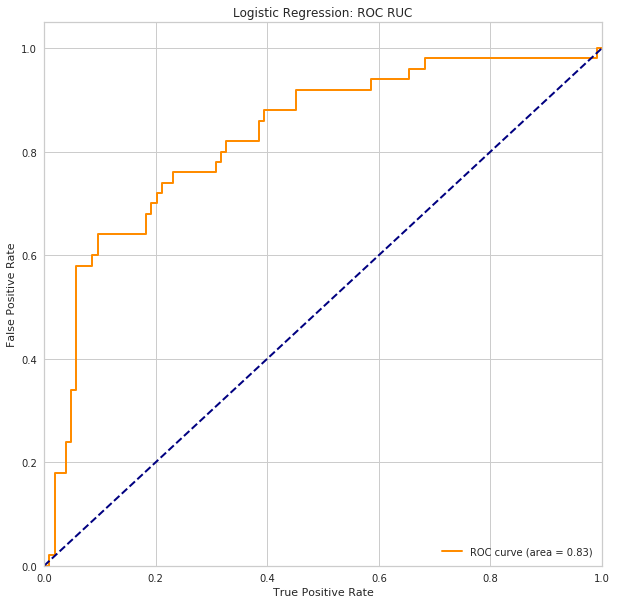

In [0]:
# ROC RUC for Logistic Regression
predictions=model_Log.predict_proba(test_x)
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions[:, 1])
roc_auc=auc(false_positive_rate,recall)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.title('Logistic Regression: ROC RUC')
plt.plot(false_positive_rate, recall, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()

In [0]:
# and here is the accuracy of Random Forest Classifier, as 0.74
model_RFC = RandomForestClassifier(random_state=45)
model_RFC.fit(train_x,train_y)
print("Accuracy using RandomForestClassifier ",accuracy_score(test_y,model_RFC.predict(test_x)))

Accuracy using RandomForestClassifier  0.7467532467532467


<Figure size 432x288 with 0 Axes>

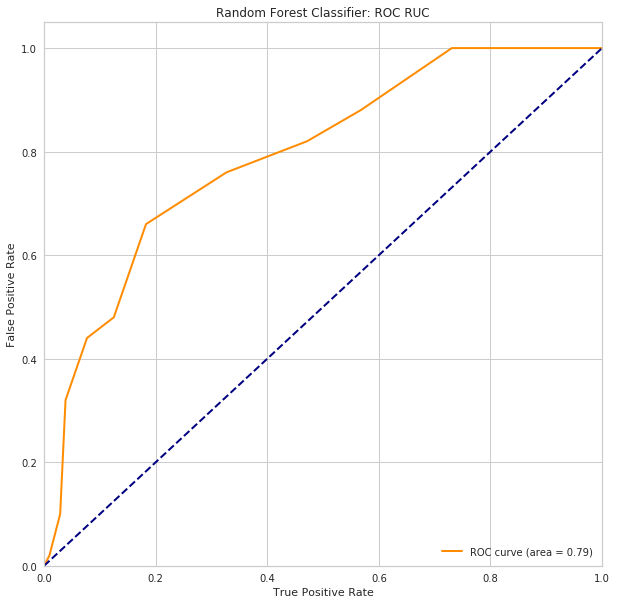

In [0]:
# ROC RUC for Random Forest Classifier
predictions=model_RFC.predict_proba(test_x)
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions[:, 1])
roc_auc=auc(false_positive_rate,recall)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.title('Random Forest Classifier: ROC RUC')
plt.plot(false_positive_rate, recall, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()

In [0]:
# here is the accuracy of SVM:C=0.8, kernel='linear' , as 0.77
clf1 = svm.SVC(C=0.8, kernel='linear', decision_function_shape='ovr')
clf1.fit(train_x, train_y)
print(clf1.score(train_x, train_y))

0.7752442996742671


In [0]:
# ROC RUC curve for SVM: C=0.8, kernel='linear'
from sklearn.metrics import roc_curve, auc
y_score = clf1.fit(train_x, train_y).decision_function(test_x)
fpr,tpr,threshold = roc_curve(test_y, y_score)
roc_auc = auc(fpr,tpr)

<Figure size 576x396 with 0 Axes>

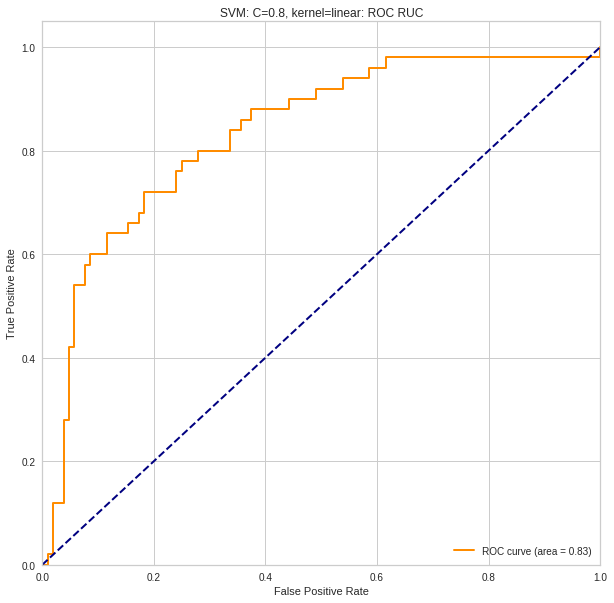

In [0]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM: C=0.8, kernel=linear: ROC RUC')
plt.legend(loc="lower right")
plt.show()

In [0]:
# here is the accuracy of SVM:C=0.8, kernel='rbf' , as 1, which could result from overfitting
clf2 = svm.SVC(C=0.8, kernel='rbf', decision_function_shape='ovr')
clf2.fit(train_x, train_y)
print(clf2.score(train_x, train_y))

1.0


In [0]:
# ROC RUC curve for SVM: C=0.8, kernel='rbf'
from sklearn.metrics import roc_curve, auc
y_score = clf2.fit(train_x, train_y).decision_function(test_x)
fpr,tpr,threshold = roc_curve(test_y, y_score)
roc_auc = auc(fpr,tpr)

<Figure size 432x288 with 0 Axes>

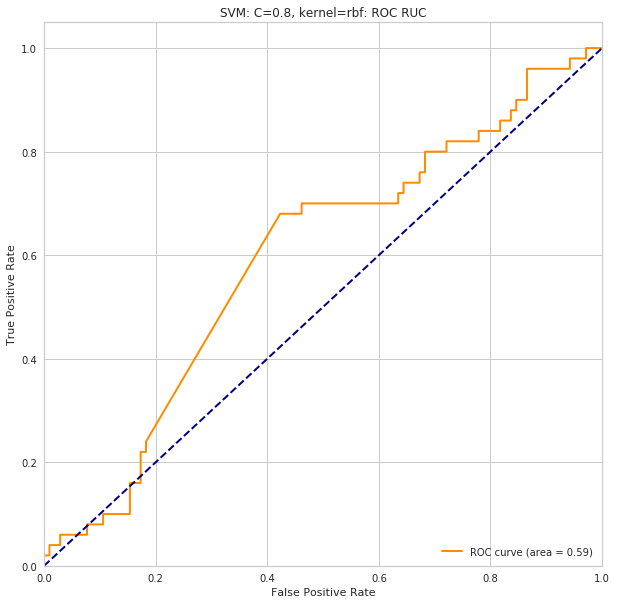

In [0]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM: C=0.8, kernel=rbf: ROC RUC')
plt.legend(loc="lower right")
plt.show()

In [0]:
# SVM GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
parameters = {'kernel':('linear', 'rbf'), 'C':[0.8,0.9,1]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, scoring='f1_macro', cv=5)
result = clf.fit(train_x, train_y)

In [0]:
# Result of SVM GridSearch
result_svc = pd.DataFrame(result.cv_results_)
result_svc.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,2.605220,1.175039,0.002413,0.000106,0.9,linear,"{'C': 0.9, 'kernel': 'linear'}",0.730657,0.737034,0.721871,...,0.741463,0.015806,1,0.737572,0.742644,0.759297,0.730565,0.749342,0.743884,0.009860
4,2.770627,0.953298,0.002332,0.000024,1,linear,"{'C': 1, 'kernel': 'linear'}",0.730657,0.737034,0.721871,...,0.741463,0.015806,1,0.737572,0.748395,0.763970,0.725796,0.742751,0.743697,0.012585
0,2.802027,1.108470,0.002359,0.000013,0.8,linear,"{'C': 0.8, 'kernel': 'linear'}",0.730657,0.737034,0.721871,...,0.739927,0.015110,3,0.739475,0.742644,0.759297,0.728676,0.749342,0.743887,0.010194
1,0.016254,0.000381,0.004110,0.000303,0.8,rbf,"{'C': 0.8, 'kernel': 'rbf'}",0.392157,0.391089,0.391089,...,0.392078,0.000870,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.016115,0.000447,0.003998,0.000129,0.9,rbf,"{'C': 0.9, 'kernel': 'rbf'}",0.392157,0.391089,0.391089,...,0.392078,0.000870,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [0]:
model_Log = LogisticRegression(random_state=45)
model_Log.fit(features,target)
pred = model_Log.predict(test_x)

In [0]:
## Prediction 
# It turns out the Logistic regression has the higher accuracy number, 
# so I run this model on the test dataset,and it will return me with a list as below
prediction = pd.DataFrame({
        "id": id,
        "Outcome": pred
    })
print(prediction)

                         id  Outcome
0    <built-in function id>        0
1    <built-in function id>        0
2    <built-in function id>        0
3    <built-in function id>        1
4    <built-in function id>        0
5    <built-in function id>        0
6    <built-in function id>        1
7    <built-in function id>        0
8    <built-in function id>        0
9    <built-in function id>        0
10   <built-in function id>        0
11   <built-in function id>        0
12   <built-in function id>        0
13   <built-in function id>        0
14   <built-in function id>        0
15   <built-in function id>        0
16   <built-in function id>        0
17   <built-in function id>        0
18   <built-in function id>        1
19   <built-in function id>        0
20   <built-in function id>        0
21   <built-in function id>        1
22   <built-in function id>        0
23   <built-in function id>        0
24   <built-in function id>        1
25   <built-in function id>        0
2

## Confusion Matrix

0.7987012987012987

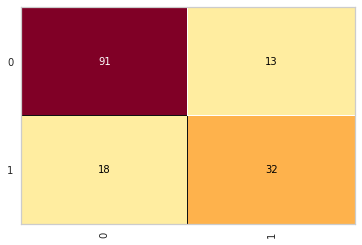

In [0]:
from yellowbrick.classifier import ConfusionMatrix

xgb = XGBClassifier()
xgb.fit(train_x,train_y)

y_pred = xgb.predict(test_x)
xgb_accy_train = round(xgb.score(train_x,train_y),2)
xgb_accy = round(xgb.score(test_x,test_y),2)

cm = ConfusionMatrix(xgb, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(train_x,train_y)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(test_x,test_y)


##AutoML

###h2o


In [0]:
!pip -q install requests

!pip -q install tabulate
!pip -q install "colorama>=0.3.8"
!pip -q install future
!pip -q install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

     |████████████████████████████████| 121.0MB 204kB/s 


In [0]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcxh0p_0v
  JVM stdout: /tmp/tmpcxh0p_0v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcxh0p_0v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_unknownUser_fj7pld
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


###Model

In [0]:
# Randomly split the data into 75% training and 25% testing.
train, test = df.split_frame(ratios=[0.75], seed=1234)

# Now train the baseline model.
# We will train a GBM model with early stopping.
from h2o.estimators.gbm import H2OGradientBoostingEstimator
x = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
y = "Outcome"

In [0]:
#train for 5 minutes, 300 maximum number of models,
#other parameters to set: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
###Access the AutoML Leaderboard
lb = aml.leaderboard
#lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_20190502_185631_model_6,0.829403,0.481206,0.240418,0.398898,0.159119
StackedEnsemble_BestOfFamily_AutoML_20190502_185631,0.828239,0.485238,0.244597,0.398547,0.15884
XGBoost_3_AutoML_20190502_185631,0.82809,0.486102,0.225552,0.399283,0.159427
XGBoost_1_AutoML_20190502_185631,0.827892,0.48321,0.22809,0.399288,0.159431
XGBoost_grid_1_AutoML_20190502_185631_model_8,0.826463,0.486923,0.244746,0.400641,0.160513
StackedEnsemble_AllModels_AutoML_20190502_185631,0.826112,0.48812,0.250209,0.399758,0.159806
GLM_grid_1_AutoML_20190502_185631_model_1,0.82603,0.487539,0.251343,0.398129,0.158507
XGBoost_grid_1_AutoML_20190502_185631_model_1,0.825847,0.487329,0.240075,0.400306,0.160245
GBM_grid_1_AutoML_20190502_185631_model_3,0.825287,0.564413,0.238806,0.43585,0.189965
XGBoost_2_AutoML_20190502_185631,0.824955,0.490386,0.250537,0.401755,0.161407


In [0]:
#Best Model: XGBoost_grid_1_AutoML_20190502_185631_model_6 
#Prediction 
preds = aml.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [0]:
preds

predict,p0,p1
0,0.965843,0.0341569
0,0.824579,0.175421
1,0.321856,0.678144
1,0.503898,0.496102
0,0.740984,0.259016
1,0.495441,0.504559
0,0.73419,0.26581
0,0.796625,0.203375
1,0.322252,0.677748
0,0.600873,0.399127


In [0]:
#save leader model
#h2o.save_model(aml.leader, path = "./Loan_Pred_Model_III_shaz13")